In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

plt.style.use('fivethirtyeight')
%matplotlib inline

# Loading data

In [2]:
data = pd.read_csv('hour.csv', sep = ',')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Separate date

In [3]:
data["date"] = data.dteday.apply(lambda x : x.split()[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,2011-01-01,1,0,1,0,0,5,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01
1,2,2011-01-01,1,0,1,1,0,5,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01
2,3,2011-01-01,1,0,1,2,0,5,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01
3,4,2011-01-01,1,0,1,3,0,5,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01
4,5,2011-01-01,1,0,1,4,0,5,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01


# Categorical Features and drop features

In [4]:
categoricalFeatureNames = ["season","holiday","workingday","weathersit","weekday","mnth","yr","hr"]
numericalFeatureNames = ["temp","hum","windspeed","atemp"]
dropFeatures = ['casual',"cnt","dteday","date","registered"]

In [5]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

# Build Train and test data

In [6]:
data = data[pd.notnull(data['cnt'])].sort_values(by=["dteday"])
y = data["cnt"]

data  = data.drop(dropFeatures,axis=1)
X_train, X_test, y_train, y_test = train_test_split( data, y, test_size=0.3, random_state=42)

# Create model

In [7]:
rfModel = RandomForestRegressor(n_estimators=500)
rfModel.fit(X = X_train,y = np.log1p(y_train))
preds = rfModel.predict(X= X_test)

# Analyze the results

In [8]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [9]:
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(np.log1p(y_test)),np.exp(preds),False))

RMSLE Value For Random Forest:  0.2870312667216299


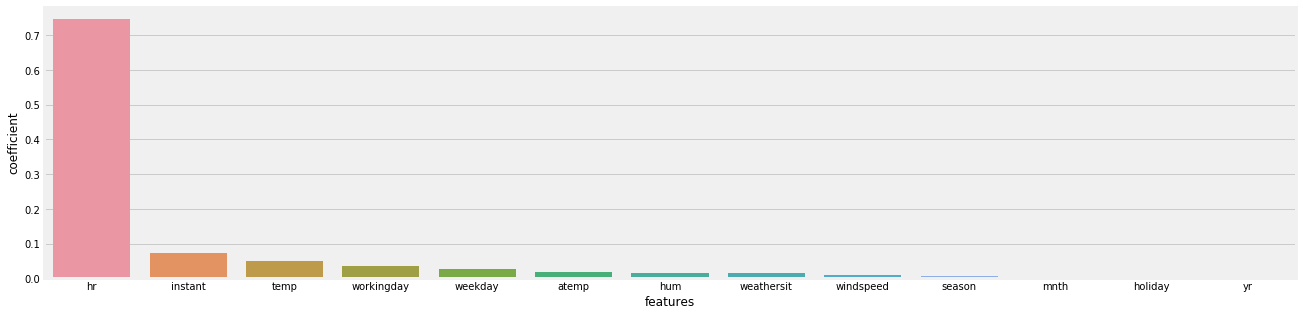

In [10]:
features = pd.DataFrame()
features['features'] = X_train.columns
features['coefficient'] = rfModel.feature_importances_
features.sort_values(by=['coefficient'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=features,x="features",y="coefficient",ax=ax)